## Description

* This project July August and September explores and analyzes the sales prices of houses sold in Windsor, Canada. 
* The dataset is taken from the Data Archive of the Journal of Applied Econometrics and contains information about various housing characteristics.
* This project contributes to insights into the factors affecting housing prices. 
* The analysis can be applied to other housing markets and can be used to make decisions in the real estate sector.

#### Features
* Price: The selling price of a house.
* Lotsize: The lot size of a property in square meters.
* Bedrooms: Number of bedrooms.
* Bathrooms: The exact number of bathrooms.
* Floor: The number of floors except the basement.
* Driveway: Does the house have a driveway or not.
* Recreation: does the house have a relaxation room or not
* Fullbase: Does the house have a fully finished basement or not.
* Gasheat: Is there a use of gas for heating hot water in the house or not.
* Air conditioning: is there a central air conditioner or not
* Garage: The number of garage spaces.
* Prefer: whether the house is located in the preferred neighborhood of the city

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("HousePrices.csv")

In [3]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
#Unnamed: 0 alanı kaldırıldı
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df.rename(columns={"stories": "floor"}, inplace=True)


In [6]:
#Boş değer var mı
df.isnull().sum()

price         0
lotsize       0
bedrooms      0
bathrooms     0
floor         0
driveway      0
recreation    0
fullbase      0
gasheat       0
aircon        0
garage        0
prefer        0
dtype: int64

In [7]:
#Veri seti boyutu
df.shape

(546, 12)

In [8]:
#Veri seti bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       546 non-null    float64
 1   lotsize     546 non-null    int64  
 2   bedrooms    546 non-null    int64  
 3   bathrooms   546 non-null    int64  
 4   floor       546 non-null    int64  
 5   driveway    546 non-null    object 
 6   recreation  546 non-null    object 
 7   fullbase    546 non-null    object 
 8   gasheat     546 non-null    object 
 9   aircon      546 non-null    object 
 10  garage      546 non-null    int64  
 11  prefer      546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [9]:
df.describe()

,price,lotsize,bedrooms,bathrooms,floor,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df1=df.copy()

In [11]:
#Korelasyon analizi için Label encder uygulandı
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['driveway'] = le.fit_transform(df1['driveway'])
df1['recreation'] = le.fit_transform(df1['recreation'])
df1['fullbase'] = le.fit_transform(df1['fullbase'])
df1['gasheat'] = le.fit_transform(df1['gasheat'])
df1['aircon'] = le.fit_transform(df1['aircon'])
df1['garage'] = le.fit_transform(df1['garage'])
df1['prefer'] = le.fit_transform(df1['prefer'])

In [12]:
df1.head()

,price,lotsize,bedrooms,bathrooms,floor,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [13]:
df.head(2)

,price,lotsize,bedrooms,bathrooms,floor,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no


In [14]:
df[df.duplicated()]

,price,lotsize,bedrooms,bathrooms,floor,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
534,82000.0,5000,3,1,3,yes,no,no,no,yes,0,no


In [15]:
df = df.drop_duplicates()

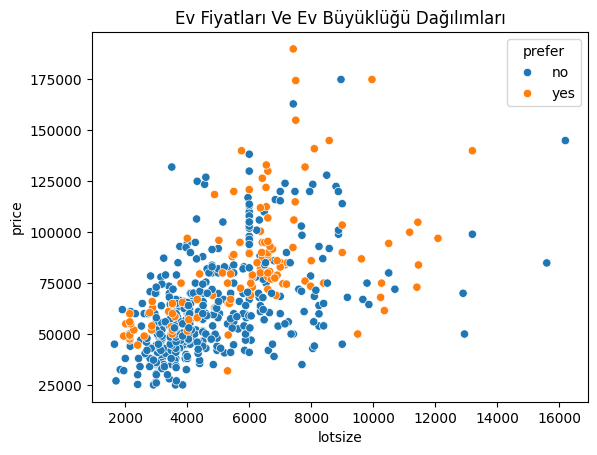

In [16]:
sns.scatterplot(data=df, x="lotsize", y="price", hue="prefer")
plt.title("Ev Fiyatları Ve Ev Büyüklüğü Dağılımları")
plt.show()

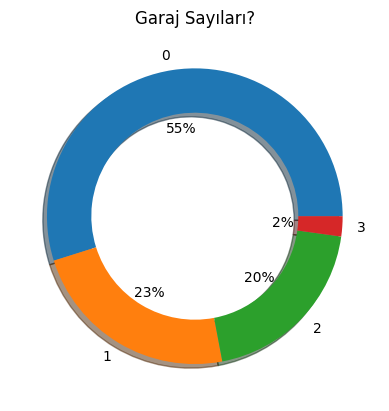

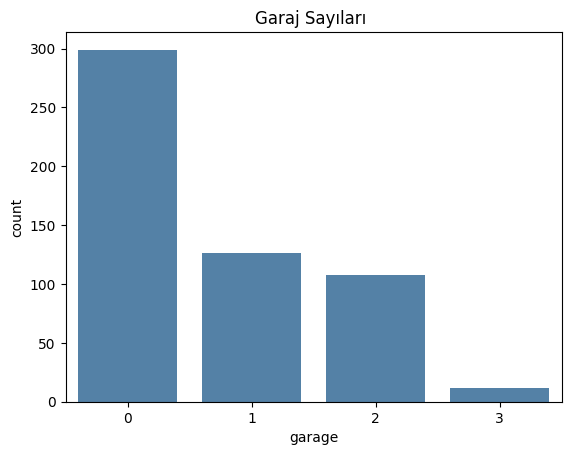

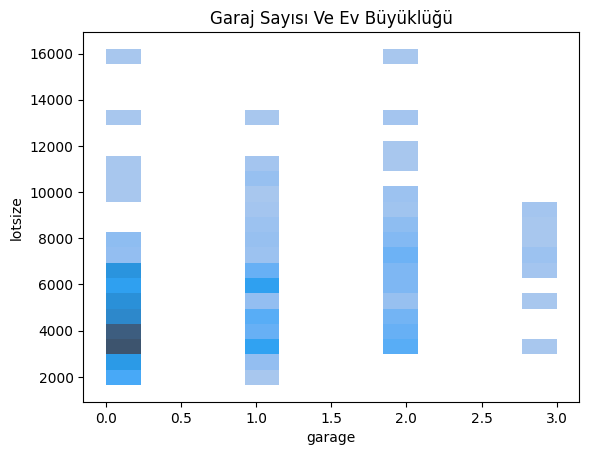

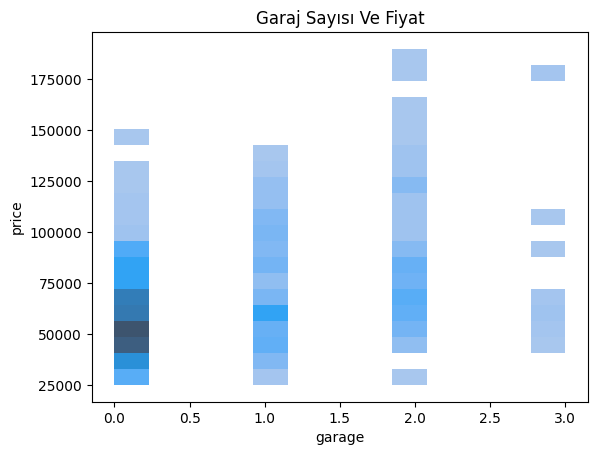

In [17]:
data = df["garage"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Garaj Sayıları?")
plt.show()
sns.countplot(x="garage", data=df, color='steelblue')
plt.title("Garaj Sayıları ")
plt.show()
sns.histplot(df, x="garage", y="lotsize")
plt.title("Garaj Sayısı Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="garage", y="price")
plt.title("Garaj Sayısı Ve Fiyat")
plt.show()

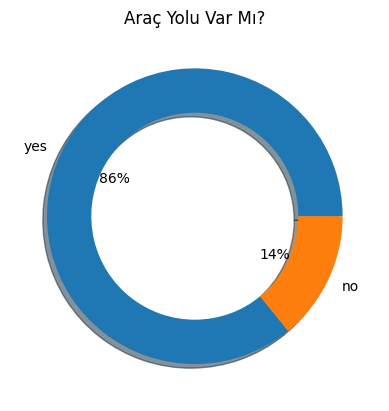

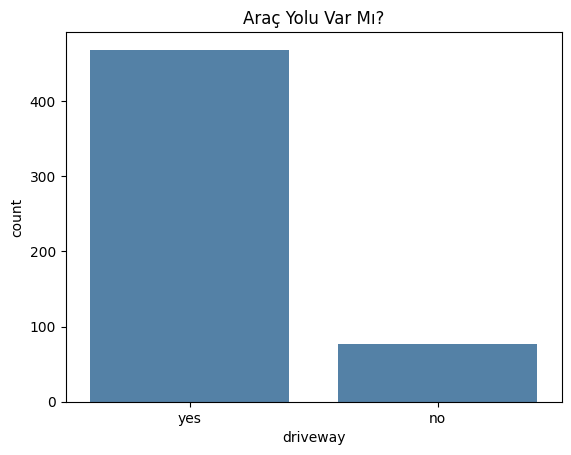

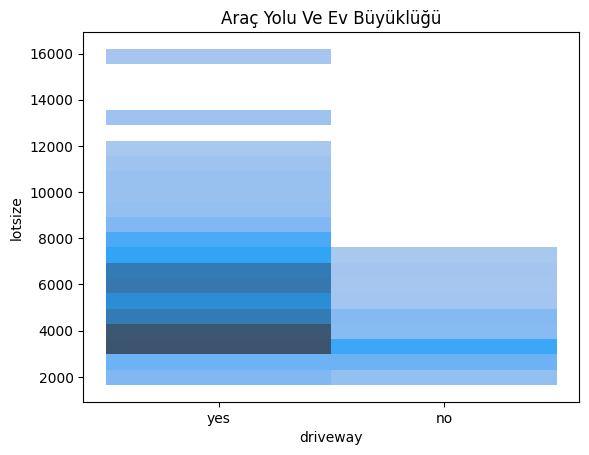

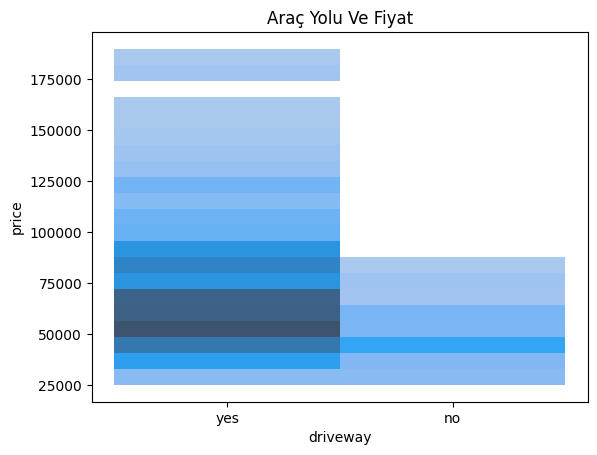

In [18]:
data = df["driveway"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Araç Yolu Var Mı?")
plt.show()
sns.countplot(x="driveway", data=df, color='steelblue')
plt.title("Araç Yolu Var Mı?")
plt.show()
sns.histplot(df, x="driveway", y="lotsize")
plt.title("Araç Yolu Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="driveway", y="price")
plt.title("Araç Yolu Ve Fiyat")
plt.show()


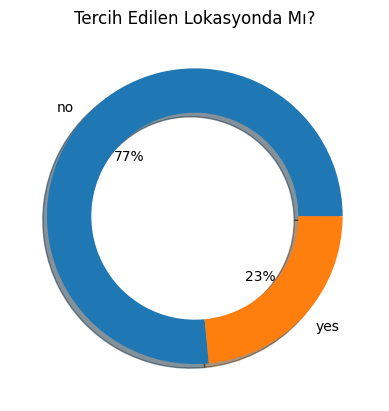

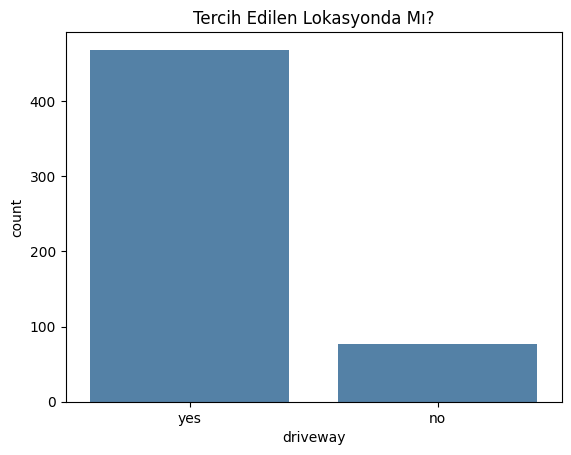

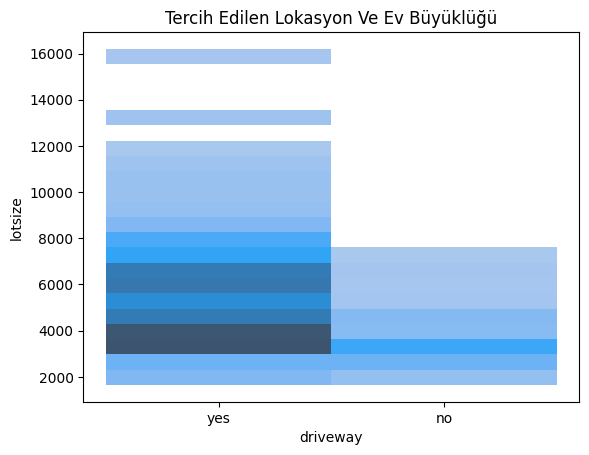

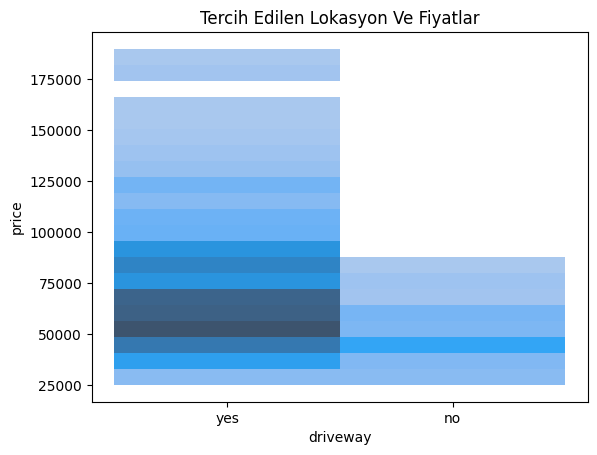

In [19]:
data = df["prefer"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Tercih Edilen Lokasyonda Mı?")
plt.show()
sns.countplot(x="driveway", data=df, color='steelblue')
plt.title("Tercih Edilen Lokasyonda Mı?")
plt.show()
sns.histplot(df, x="driveway", y="lotsize")
plt.title("Tercih Edilen Lokasyon Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="driveway", y="price")
plt.title("Tercih Edilen Lokasyon Ve Fiyatlar")
plt.show()

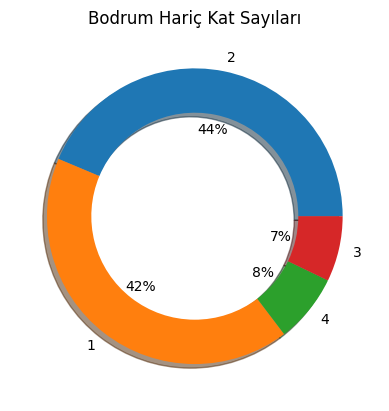

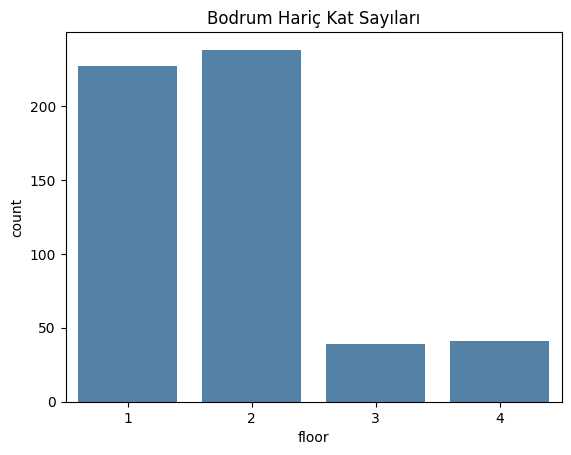

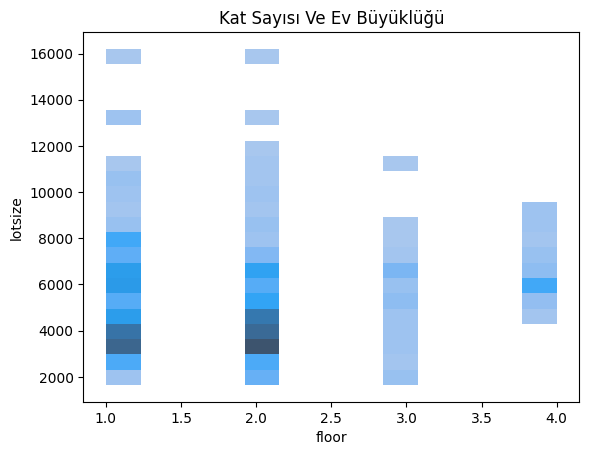

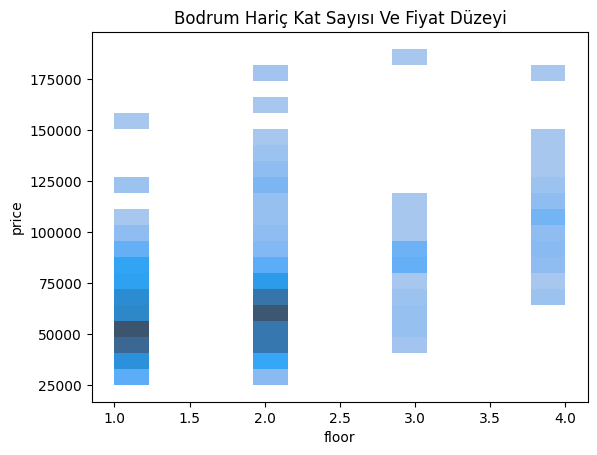

In [20]:
data = df["floor"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Bodrum Hariç Kat Sayıları")
plt.show()
sns.countplot(x="floor", data=df, color='steelblue')
plt.title("Bodrum Hariç Kat Sayıları")
plt.show()
sns.histplot(df, x="floor", y="lotsize")
plt.title("Kat Sayısı Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="floor", y="price")
plt.title("Bodrum Hariç Kat Sayısı Ve Fiyat Düzeyi")
plt.show()

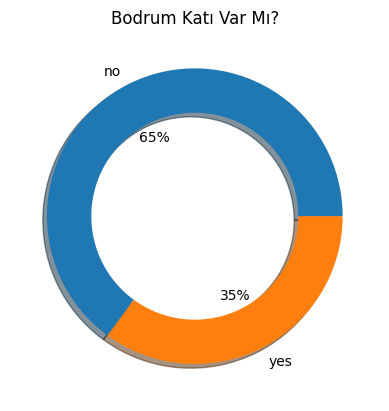

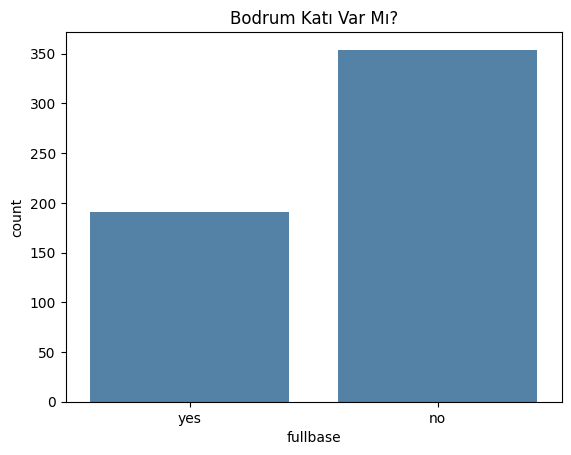

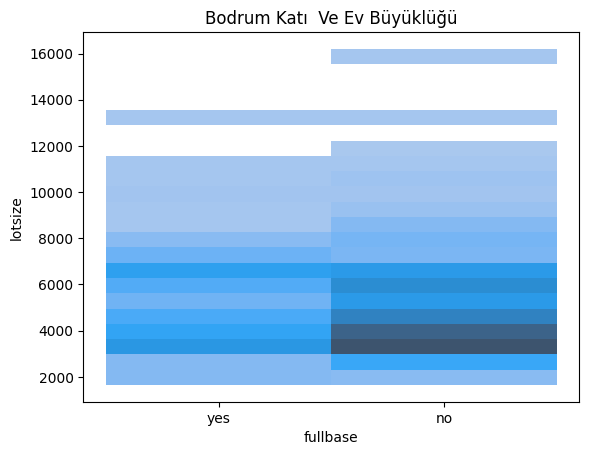

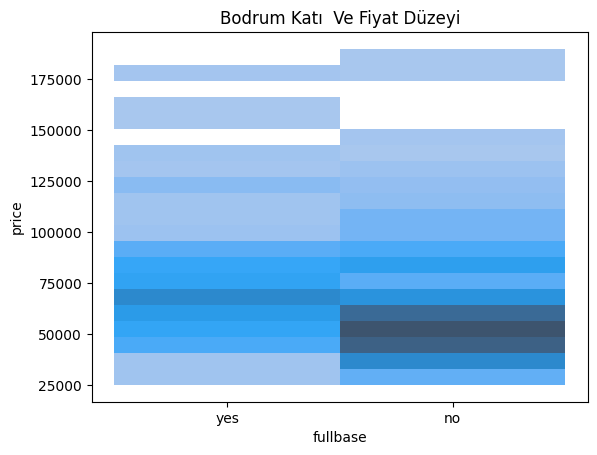

In [21]:
data = df["fullbase"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Bodrum Katı Var Mı?")
plt.show()
sns.countplot(x="fullbase", data=df, color='steelblue')
plt.title("Bodrum Katı Var Mı?")
plt.show()
sns.histplot(df, x="fullbase", y="lotsize")
plt.title("Bodrum Katı  Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="fullbase", y="price")
plt.title("Bodrum Katı  Ve Fiyat Düzeyi")
plt.show()

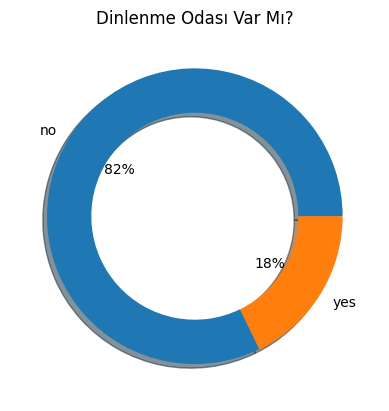

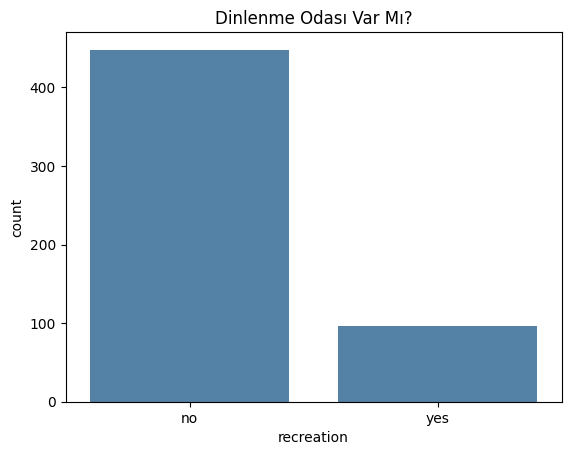

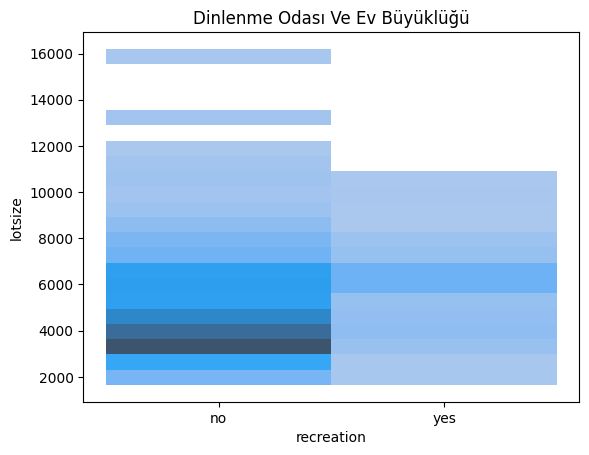

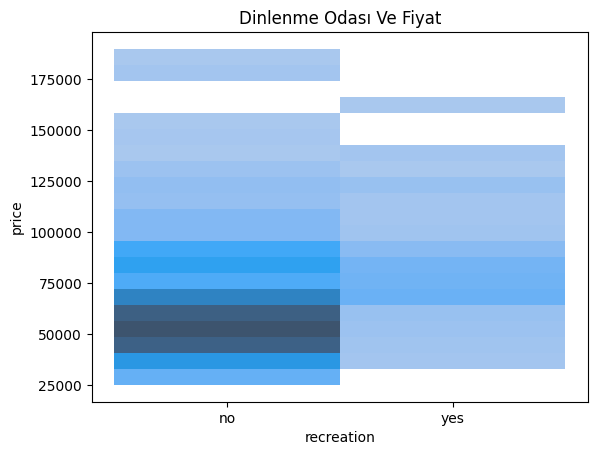

In [22]:
data = df["recreation"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Dinlenme Odası Var Mı?")
plt.show()
sns.countplot(x="recreation", data=df, color='steelblue')
plt.title("Dinlenme Odası Var Mı?")
plt.show()
sns.histplot(df, x="recreation", y="lotsize")
plt.title("Dinlenme Odası Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="recreation", y="price")
plt.title("Dinlenme Odası Ve Fiyat")
plt.show()

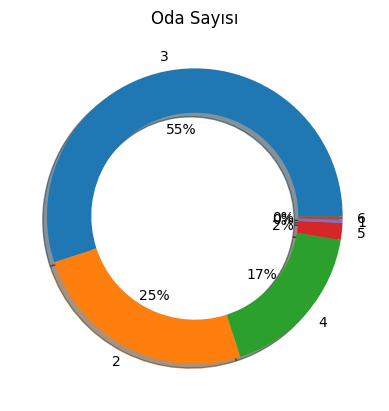

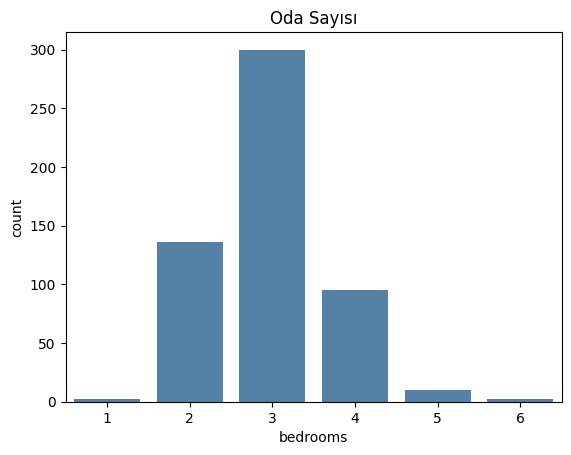

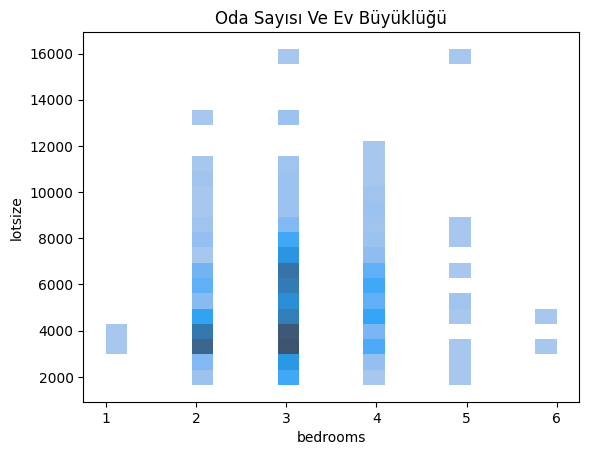

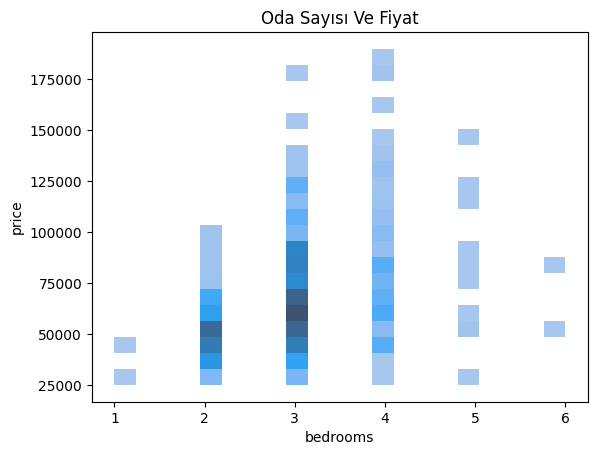

In [23]:
data = df["bedrooms"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Oda Sayısı")
plt.show()
sns.countplot(x="bedrooms", data=df, color='steelblue')
plt.title("Oda Sayısı")
plt.show()
sns.histplot(df, x="bedrooms", y="lotsize")
plt.title("Oda Sayısı Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="bedrooms", y="price")
plt.title("Oda Sayısı Ve Fiyat")
plt.show()

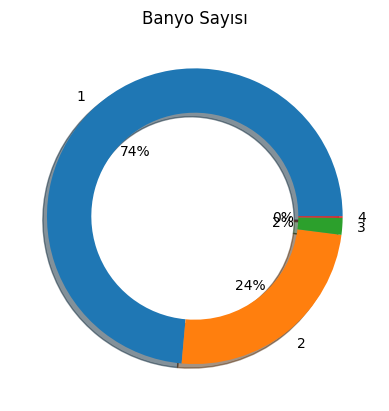

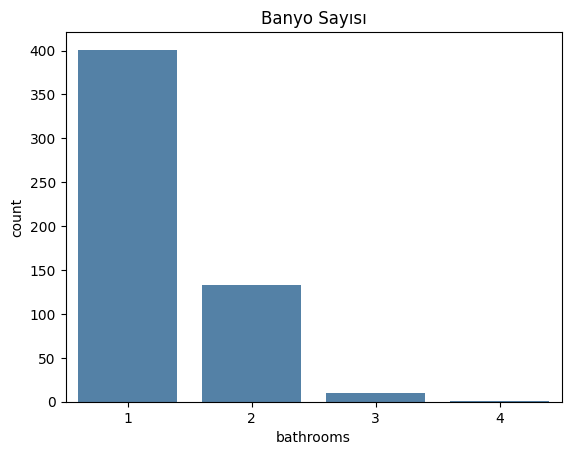

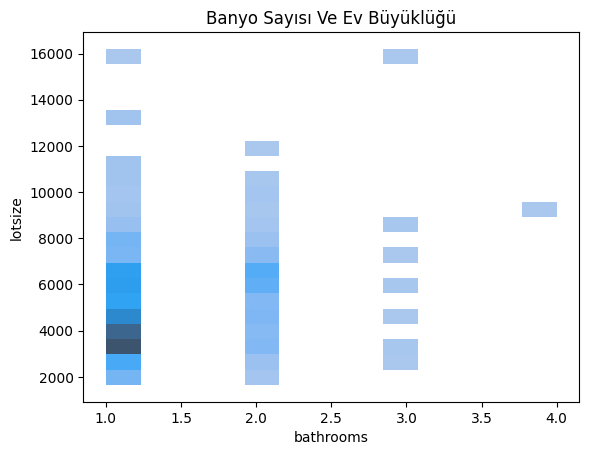

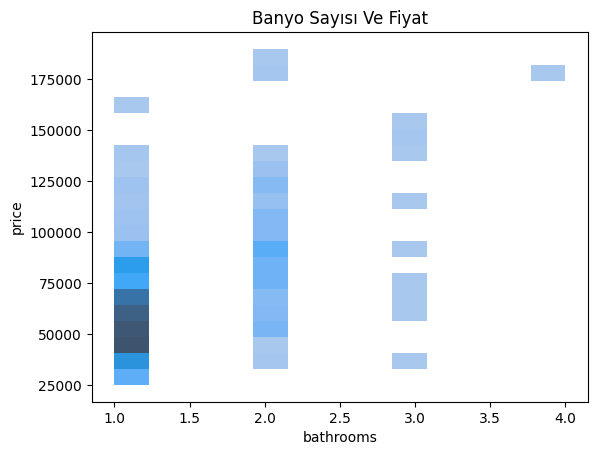

In [24]:
data = df["bathrooms"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Banyo Sayısı")
plt.show()
sns.countplot(x="bathrooms", data=df, color='steelblue')
plt.title("Banyo Sayısı")
plt.show()
sns.histplot(df, x="bathrooms", y="lotsize")
plt.title("Banyo Sayısı Ve Ev Büyüklüğü")
plt.show()
sns.histplot(df, x="bathrooms", y="price")
plt.title("Banyo Sayısı Ve Fiyat")
plt.show()

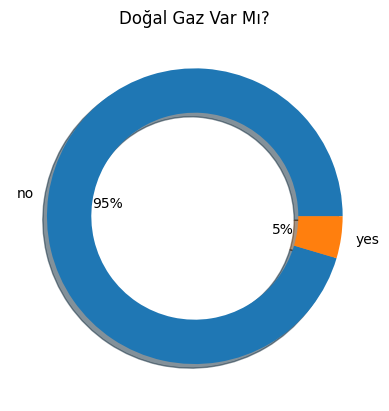

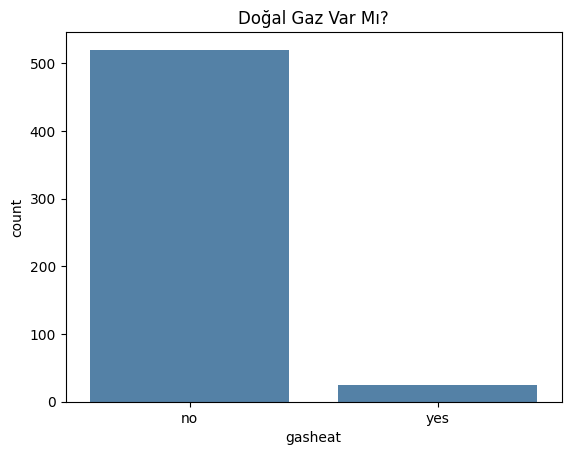

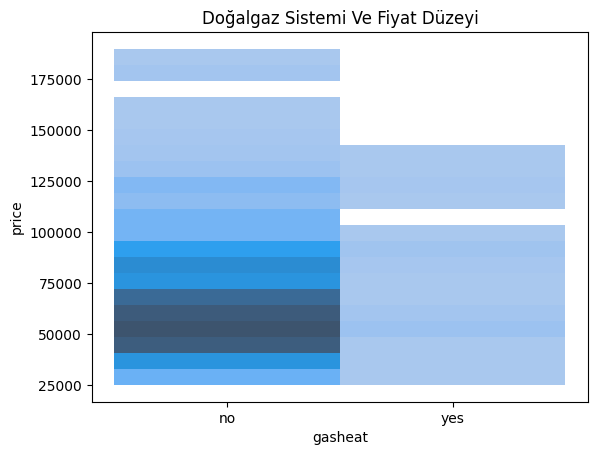

In [25]:
data = df["gasheat"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Doğal Gaz Var Mı?")
plt.show()
sns.countplot(x="gasheat", data=df, color='steelblue')
plt.title("Doğal Gaz Var Mı?")
plt.show()
sns.histplot(df, x="gasheat", y="price")
plt.title("Doğalgaz Sistemi Ve Fiyat Düzeyi")
plt.show()

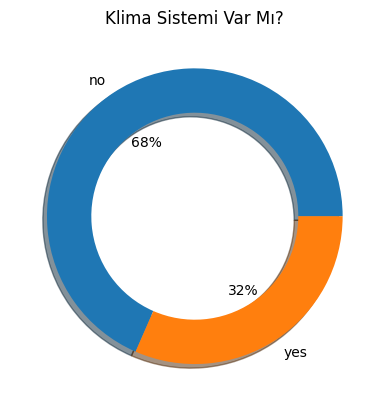

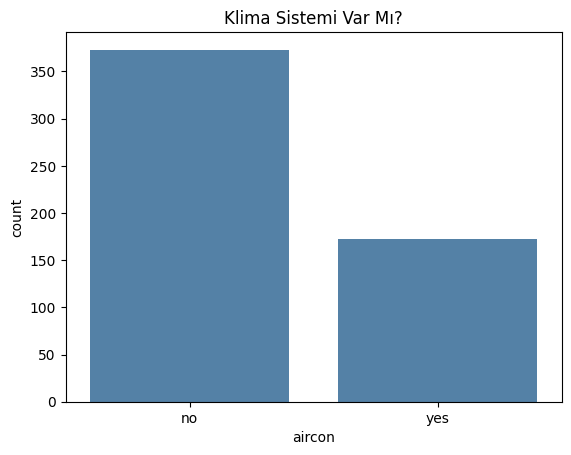

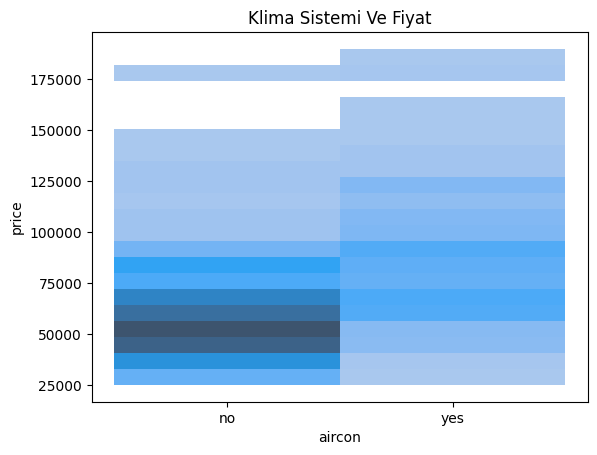

In [26]:
data = df["aircon"].value_counts()
plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
plt.title("Klima Sistemi Var Mı?")
plt.show()
sns.countplot(x="aircon", data=df, color='steelblue')
plt.title("Klima Sistemi Var Mı?")
plt.show()
sns.histplot(df, x="aircon", y="price")
plt.title("Klima Sistemi Ve Fiyat")
plt.show()

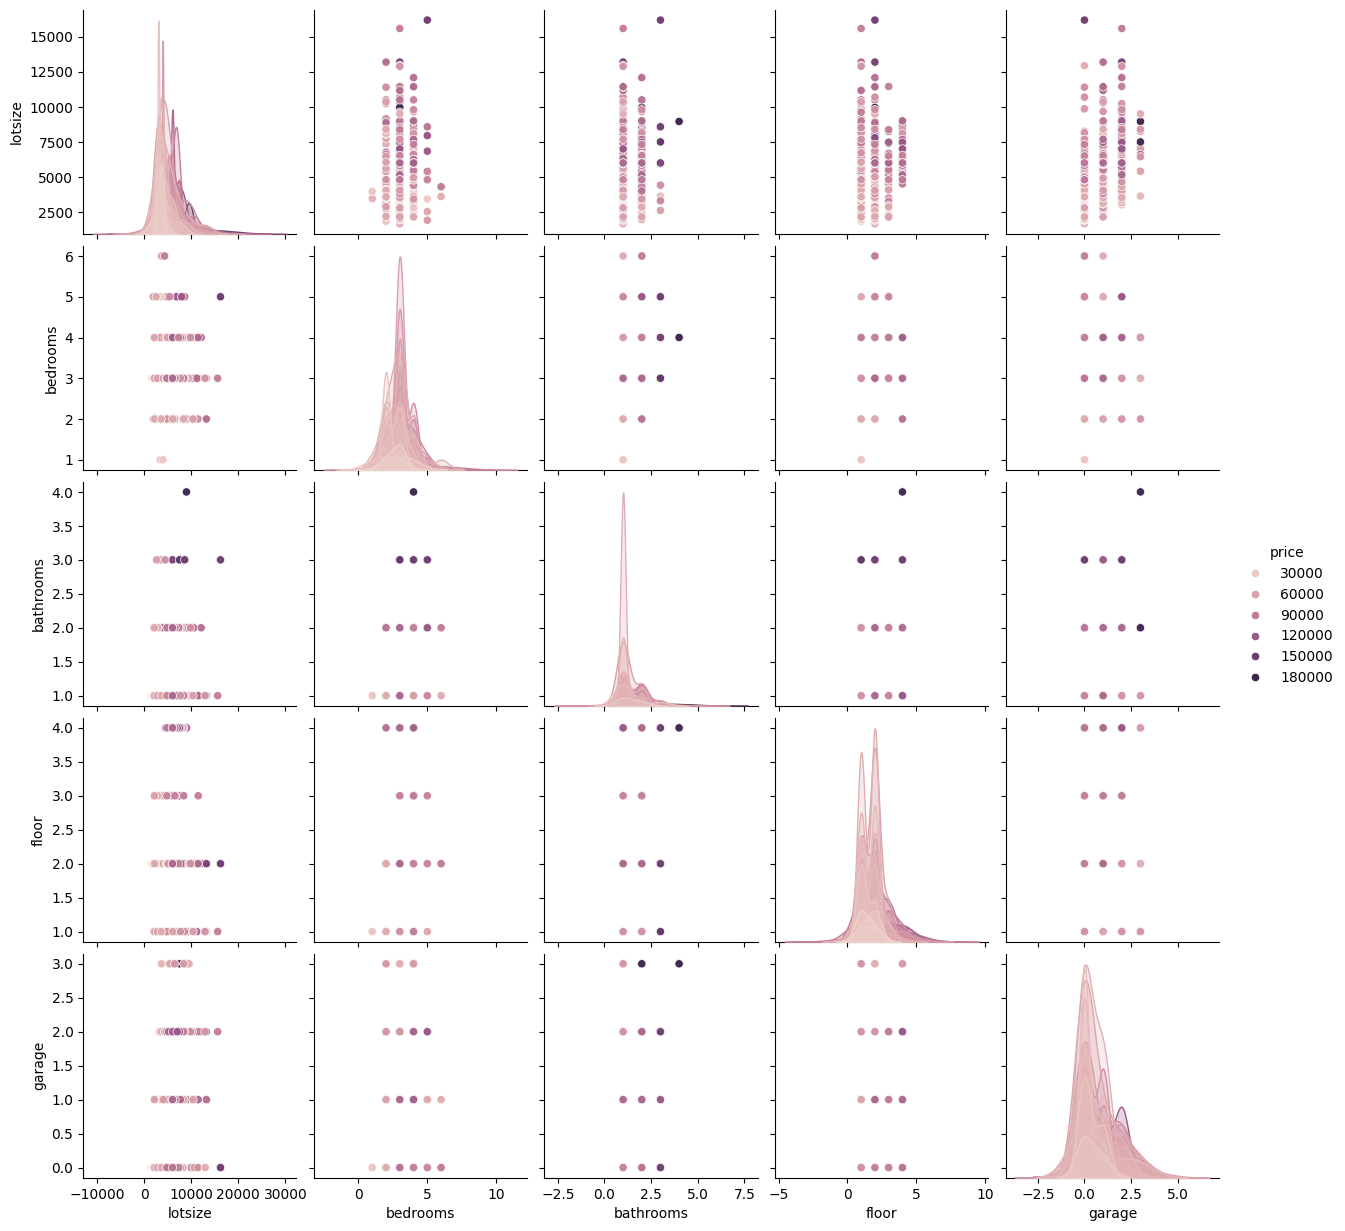

In [27]:
sns.pairplot(df, hue ='price')